<a href="https://colab.research.google.com/github/AndrewKalil/Udacity-ML/blob/master/Capstone_Project/Starbucks_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 7.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311680 sha256=f14fdcfb5aec340542cd9af8dbe28b5486b01fdee3fa612c40af67cfe6f7d7e4
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [15]:
import pandas as pd
import numpy as np

import hdbscan

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [ ]:
###################### Useful Functions for later use ########################
def plot_percentage(ax, feature):
    """
    plot_percentage: Shows the percentage that the category represents in the overall data set.
    
    Parameteres
        plot: seaborn data type
        feature: Name of the feature of the dataset
        
    Return
        None    
    """
    
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def plot_category_variable(data, column):
    """
    plot_category_variable: Display plot of categorical variables 
    
    Paramters
        column: Name of the column of the dataframe to be displayed
        
    Return 
        None                
    """
    
    plt.figure(figsize=(8, 6)) 
    ax = sns.countplot(x=column, data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.suptitle('Frecuency of ' + column)

    plot_percentage(ax, data[column])

def plot_cat_num_variable(data, cat, num):
    """
    plot_category_variable: Display plot of categorical variables 
    
    Paramters
        column: Name of the column of the dataframe to be displayed
        
    Return 
        None                
    """
    
    plt.figure(figsize=(8, 6)) 
    ax = sns.barplot(x=cat, y = num, data = data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.suptitle(cat + ' Vs ' + num)
    
    plt.show()


In [ ]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


In [ ]:
data = pd.read_csv('drive/MyDrive/Udacity/scaled_dataset.csv')
data.drop(columns=["Unnamed: 0" ], inplace=True)
data

,gender,income,total_completed,total_viewed,total_received,total_spent,avg_spent,completed_bogo,completed_discount,age_range,num_transactions_range,bogos_received_range,discounts_received_range,percent_viewed_range,percent_completed_range,discount_percent_completed_range,bogo_percent_completed_range
0,0,0.911111,1,0,2,0.047886,0.055432,1,0,4,0,0,0,0,5,0,5
1,0,0.777778,3,4,4,0.098881,0.048780,3,0,6,6,3,0,9,7,0,3
2,1,0.444444,2,3,4,0.035448,0.042129,1,2,5,0,0,3,7,5,4,3
3,1,0.255556,5,6,6,0.022388,0.026608,2,2,5,0,1,3,9,8,3,1
4,1,0.233333,1,2,3,0.009328,0.006652,0,2,4,0,0,3,6,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,0,0.266667,0,3,3,0.012438,0.004435,1,1,3,6,0,0,9,0,5,5
14483,1,0.466667,1,1,3,0.015547,0.006652,1,0,5,6,0,0,3,3,0,5
14484,1,0.477778,0,1,3,0.024254,0.008869,0,1,3,6,0,0,3,0,9,5
14485,0,0.222222,3,3,3,0.117537,0.028825,3,0,7,1,3,0,9,9,0,3


In [ ]:


def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

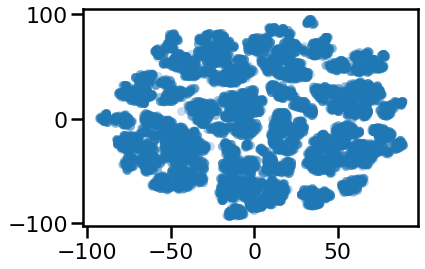

In [ ]:
from sklearn.manifold import TSNE

scaled_dataset = pd.read_csv('drive/MyDrive/Udacity/scaled_dataset.csv')
scaled_dataset.drop(columns=["Unnamed: 0"], inplace=True)
scaled_dataset

projection = TSNE().fit_transform(scaled_dataset)
plt.scatter(*projection.T, **plot_kwds)


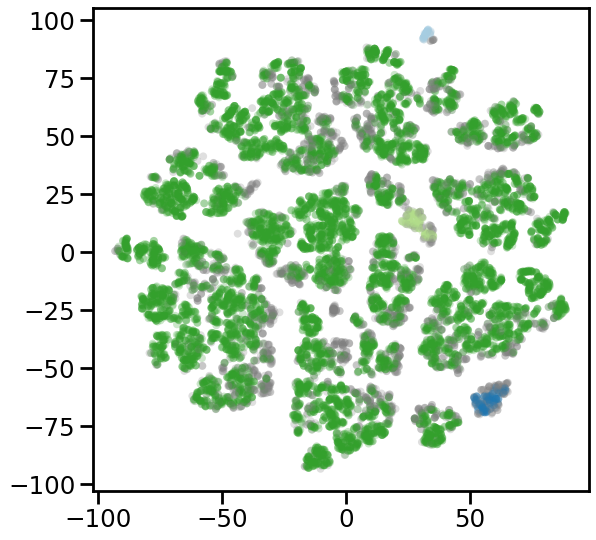

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=35, min_samples=10).fit(data)

plt.figure(figsize=(8, 8), dpi=80)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)



First, we test the data set without PCA to see how the algorithm groups the data and what distribution it has.

It is important to mention that the black dots inside the graph represent the noise detected by the HDBSCAN algorithm, and that the label will be identified with the value -1. In the meantime, it can be observed that the green cluster represents a large percentage of the data, as shown in the following image.

NOTE: After several trials with the parameters it was defined that the best one was min_cluster_size=35and min_samples=10 as it groups the data better and generates less noise.

In [ ]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2,  3])

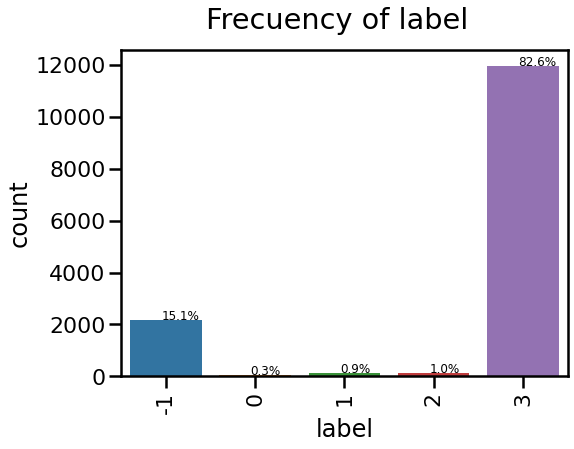

In [ ]:
label_normal = clusterer.labels_
label_normal = pd.DataFrame({"label": clusterer.labels_})

# Display plot for gender column
plot_category_variable(label_normal, 'label')

As can be seen, cluster 3 has a distribution of 82.6% and the data that generated noise was 15.1%. Clearly the algorithm did not perform a good segmentation because the data has not been applied PCA.

Next, we present the data that the dimensionality was reduced to 5 components, as specified above, because this number of components explains at least 80% of the variance of the data.

In [ ]:
pca = pd.read_csv('drive/MyDrive/Udacity/pca_scores.csv')
pca.drop(columns=["Unnamed: 0" ], inplace=True)
pca

,c_1,c_2,c_3,c_4,c_5
0,-2.620176,-1.928997,-4.023331,7.190509,-3.338821
1,4.298525,2.480468,2.814970,0.869880,-3.051544
2,-0.090560,-2.853034,-1.224657,0.493026,1.071919
3,5.288128,-3.513768,-0.159936,-1.837879,1.218396
4,-2.118860,-2.629998,-1.038443,0.802769,0.593156
...,...,...,...,...,...
14482,-4.960756,3.007287,3.199022,-0.758429,0.880604
14483,-2.610750,3.544396,-0.223586,5.584210,-2.457504
14484,-8.189520,4.141242,-3.196837,-1.039618,-0.022431
14485,5.280793,-2.347610,1.013742,1.698703,-4.020551


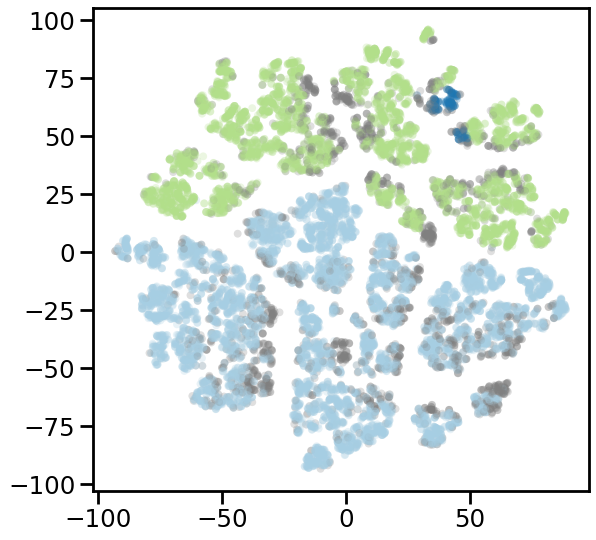

In [ ]:

clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=10).fit(pca)

plt.figure(figsize=(8, 8), dpi=80)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [ ]:
np.unique(clusterer.labels_)

array([-1,  0,  1,  2])

In [ ]:
label_pca = clusterer.labels_
label_pca = pd.DataFrame({"label": clusterer.labels_})

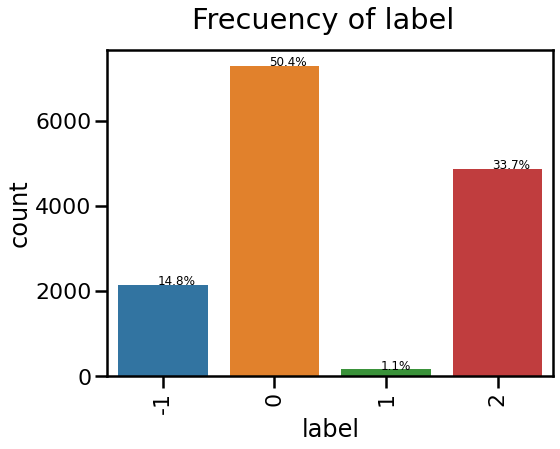

In [ ]:
# Display plot for gender column
plot_category_variable(label_pca, 'label')

In [ ]:
# Save dataset with each cluster
df_cluster = data.copy()
df_cluster['labels'] = clusterer.labels_
df_cluster

,gender,income,total_completed,total_viewed,total_received,total_spent,avg_spent,completed_bogo,completed_discount,age_range,num_transactions_range,bogos_received_range,discounts_received_range,percent_viewed_range,percent_completed_range,discount_percent_completed_range,bogo_percent_completed_range,labels
0,0,0.911111,1,0,2,0.047886,0.055432,1,0,4,0,0,0,0,5,0,5,-1
1,0,0.777778,3,4,4,0.098881,0.048780,3,0,6,6,3,0,9,7,0,3,2
2,1,0.444444,2,3,4,0.035448,0.042129,1,2,5,0,0,3,7,5,4,3,0
3,1,0.255556,5,6,6,0.022388,0.026608,2,2,5,0,1,3,9,8,3,1,0
4,1,0.233333,1,2,3,0.009328,0.006652,0,2,4,0,0,3,6,3,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482,0,0.266667,0,3,3,0.012438,0.004435,1,1,3,6,0,0,9,0,5,5,2
14483,1,0.466667,1,1,3,0.015547,0.006652,1,0,5,6,0,0,3,3,0,5,-1
14484,1,0.477778,0,1,3,0.024254,0.008869,0,1,3,6,0,0,3,0,9,5,2
14485,0,0.222222,3,3,3,0.117537,0.028825,3,0,7,1,3,0,9,9,0,3,0


In [ ]:
# Save clusters model
df_cluster.to_csv('drive/MyDrive/Udacity/final_segmentation.csv')

#### What personal attributes of our customers are defined in ecah cluster?
Let us look at persoonal attributes first

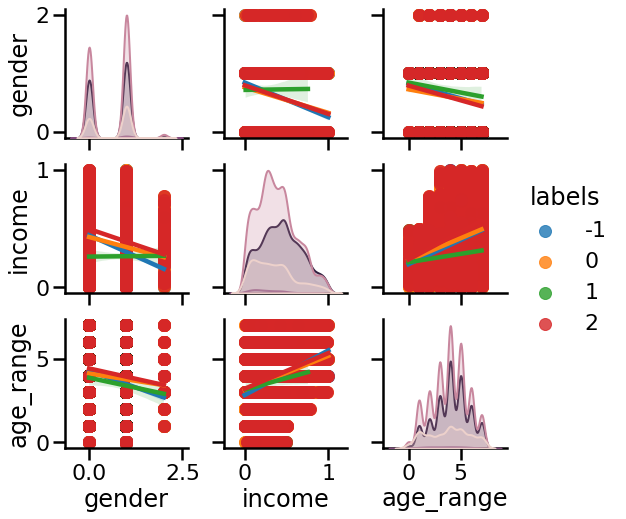

In [16]:
#Viewing personal customer details in a seaborn pairplot
#Special thanks to this for assistance: https://seaborn.pydata.org/generated/seaborn.pairplot.html
df_cluster = pd.read_csv('drive/MyDrive/Udacity/final_segmentation.csv')
df_cluster.drop(columns=['Unnamed: 0'], inplace=True)
personal_details = ['gender', 'income', 'age_range', 'labels']
sns.pairplot(df_cluster[personal_details], hue='labels', kind='reg');

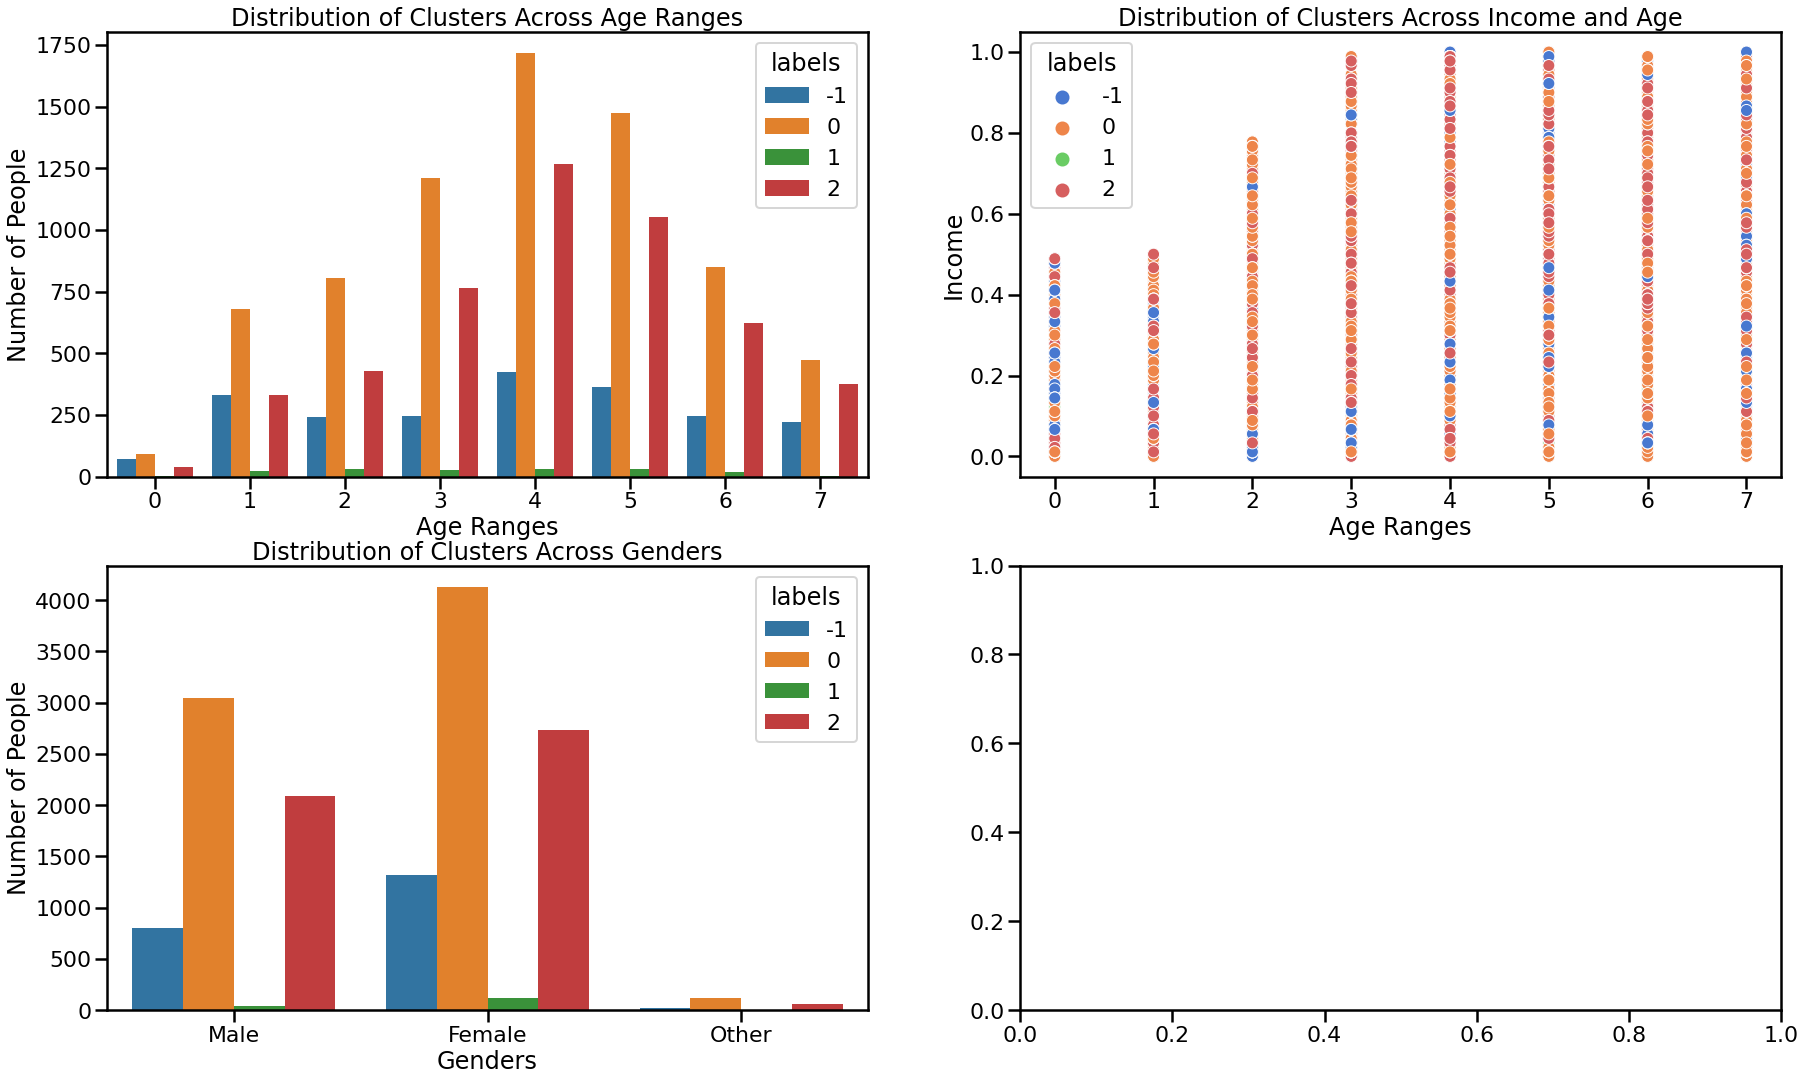

In [25]:
# A deep dive into the customer personal attributes of the cluster data
# Credits https://stackoverflow.com/questions/1358977/how-to-make-several-plots-on-a-single-page-using-matplotlib
# Credits thanks to this post for assistance: https://stackoverflow.com/questions/19626530/python-xticks-in-subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 18))

#Visualizing clusters across age ranges
sns.countplot(data = df_cluster, x = 'age_range', hue = 'labels', ax = axes[0,0]);
axes[0,0].set_title('Distribution of Clusters Across Age Ranges');
axes[0,0].set_xlabel('Age Ranges');
axes[0,0].set_ylabel('Number of People');

#Visualizing clusters across incomes and age ranges
sns.scatterplot(data = df_cluster, x = 'age_range', y = 'income', hue = 'labels', palette = sns.color_palette('muted', n_colors = 4), ax = axes[0,1]);
axes[0,1].set_title('Distribution of Clusters Across Income and Age');
axes[0,1].set_xlabel('Age Ranges');
axes[0,1].set_ylabel('Income');

#Visualizing clusters across age ranges
sns.countplot(data = df_cluster, x = 'gender', hue = 'labels', ax = axes[1,0]);
axes[1,0].set_title('Distribution of Clusters Across Genders');
axes[1,0].set_xlabel('Genders');
axes[1,0].set_ylabel('Number of People');
plt.sca(axes[1,0]);
plt.xticks(range(3), ['Male', 'Female', 'Other']);

# sns.countplot(data = df_cluster, x = 'gender', hue = 'avg_spent', ax = axes[1,0]);
# axes[1,0].set_title('Distribution of Clusters Across Genders');
# axes[1,0].set_xlabel('Genders');
# axes[1,0].set_ylabel('Number of People');
# plt.sca(axes[1,0]);
# plt.xticks(range(3), ['Male', 'Female', 'Other']);

### Explanation
I will try my best to explain each cluster and what these graphics actually mean.

* Cluster 0: It seems that this cluster tends to incline more towards middle ages people. Typically customers between the age of 40 and 60. This cluster also covers those customers who have the highest incomes. It seems that the older starbucks customers are the ones who have the higher incomes. That is people who are 60+ years old. Finally this cluster does not seem to care much about the gender. This is because althugh there are more females than males, there is not much of a difference. However, it is worth mentioning that there were initially more males than females in the dataset, so there bwing more females in this cluster may indicate an incline towards females basity. 

* Cluster 1: It seems that this data did not seem to incline much towards customer's personal data. There us however a slight difference in gender values. But this information is too vague and cannot be used to assume that it refers to females just because of it.

* Cluster 2: Cluster 2 seems to identify those middle aged people that have really high incomes just like the older (70+) customers of cluster 0. These are the customers between the ages of 40 and 60 that contribute to the high income values of the dataset. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


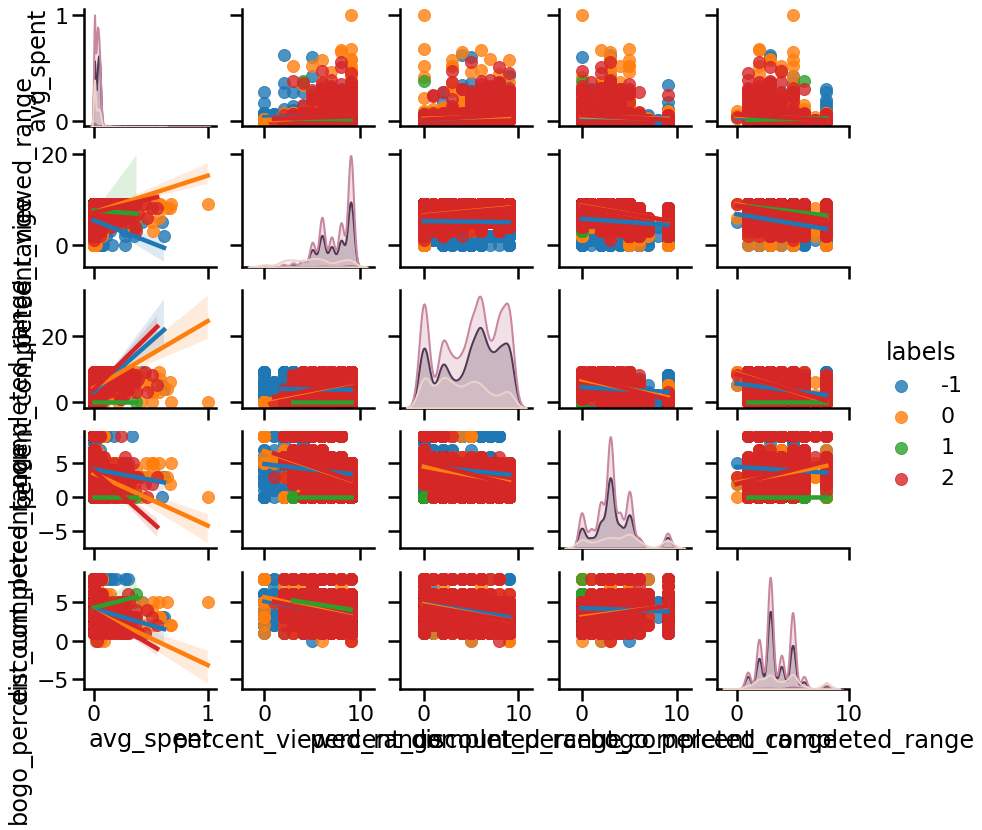

In [18]:
spending_habits = ['labels', 'avg_spent',	"percent_viewed_range",	"percent_completed_range",	"discount_percent_completed_range",	"bogo_percent_completed_range"]
sns.pairplot(df_cluster[spending_habits], hue = 'labels', kind = 'reg');

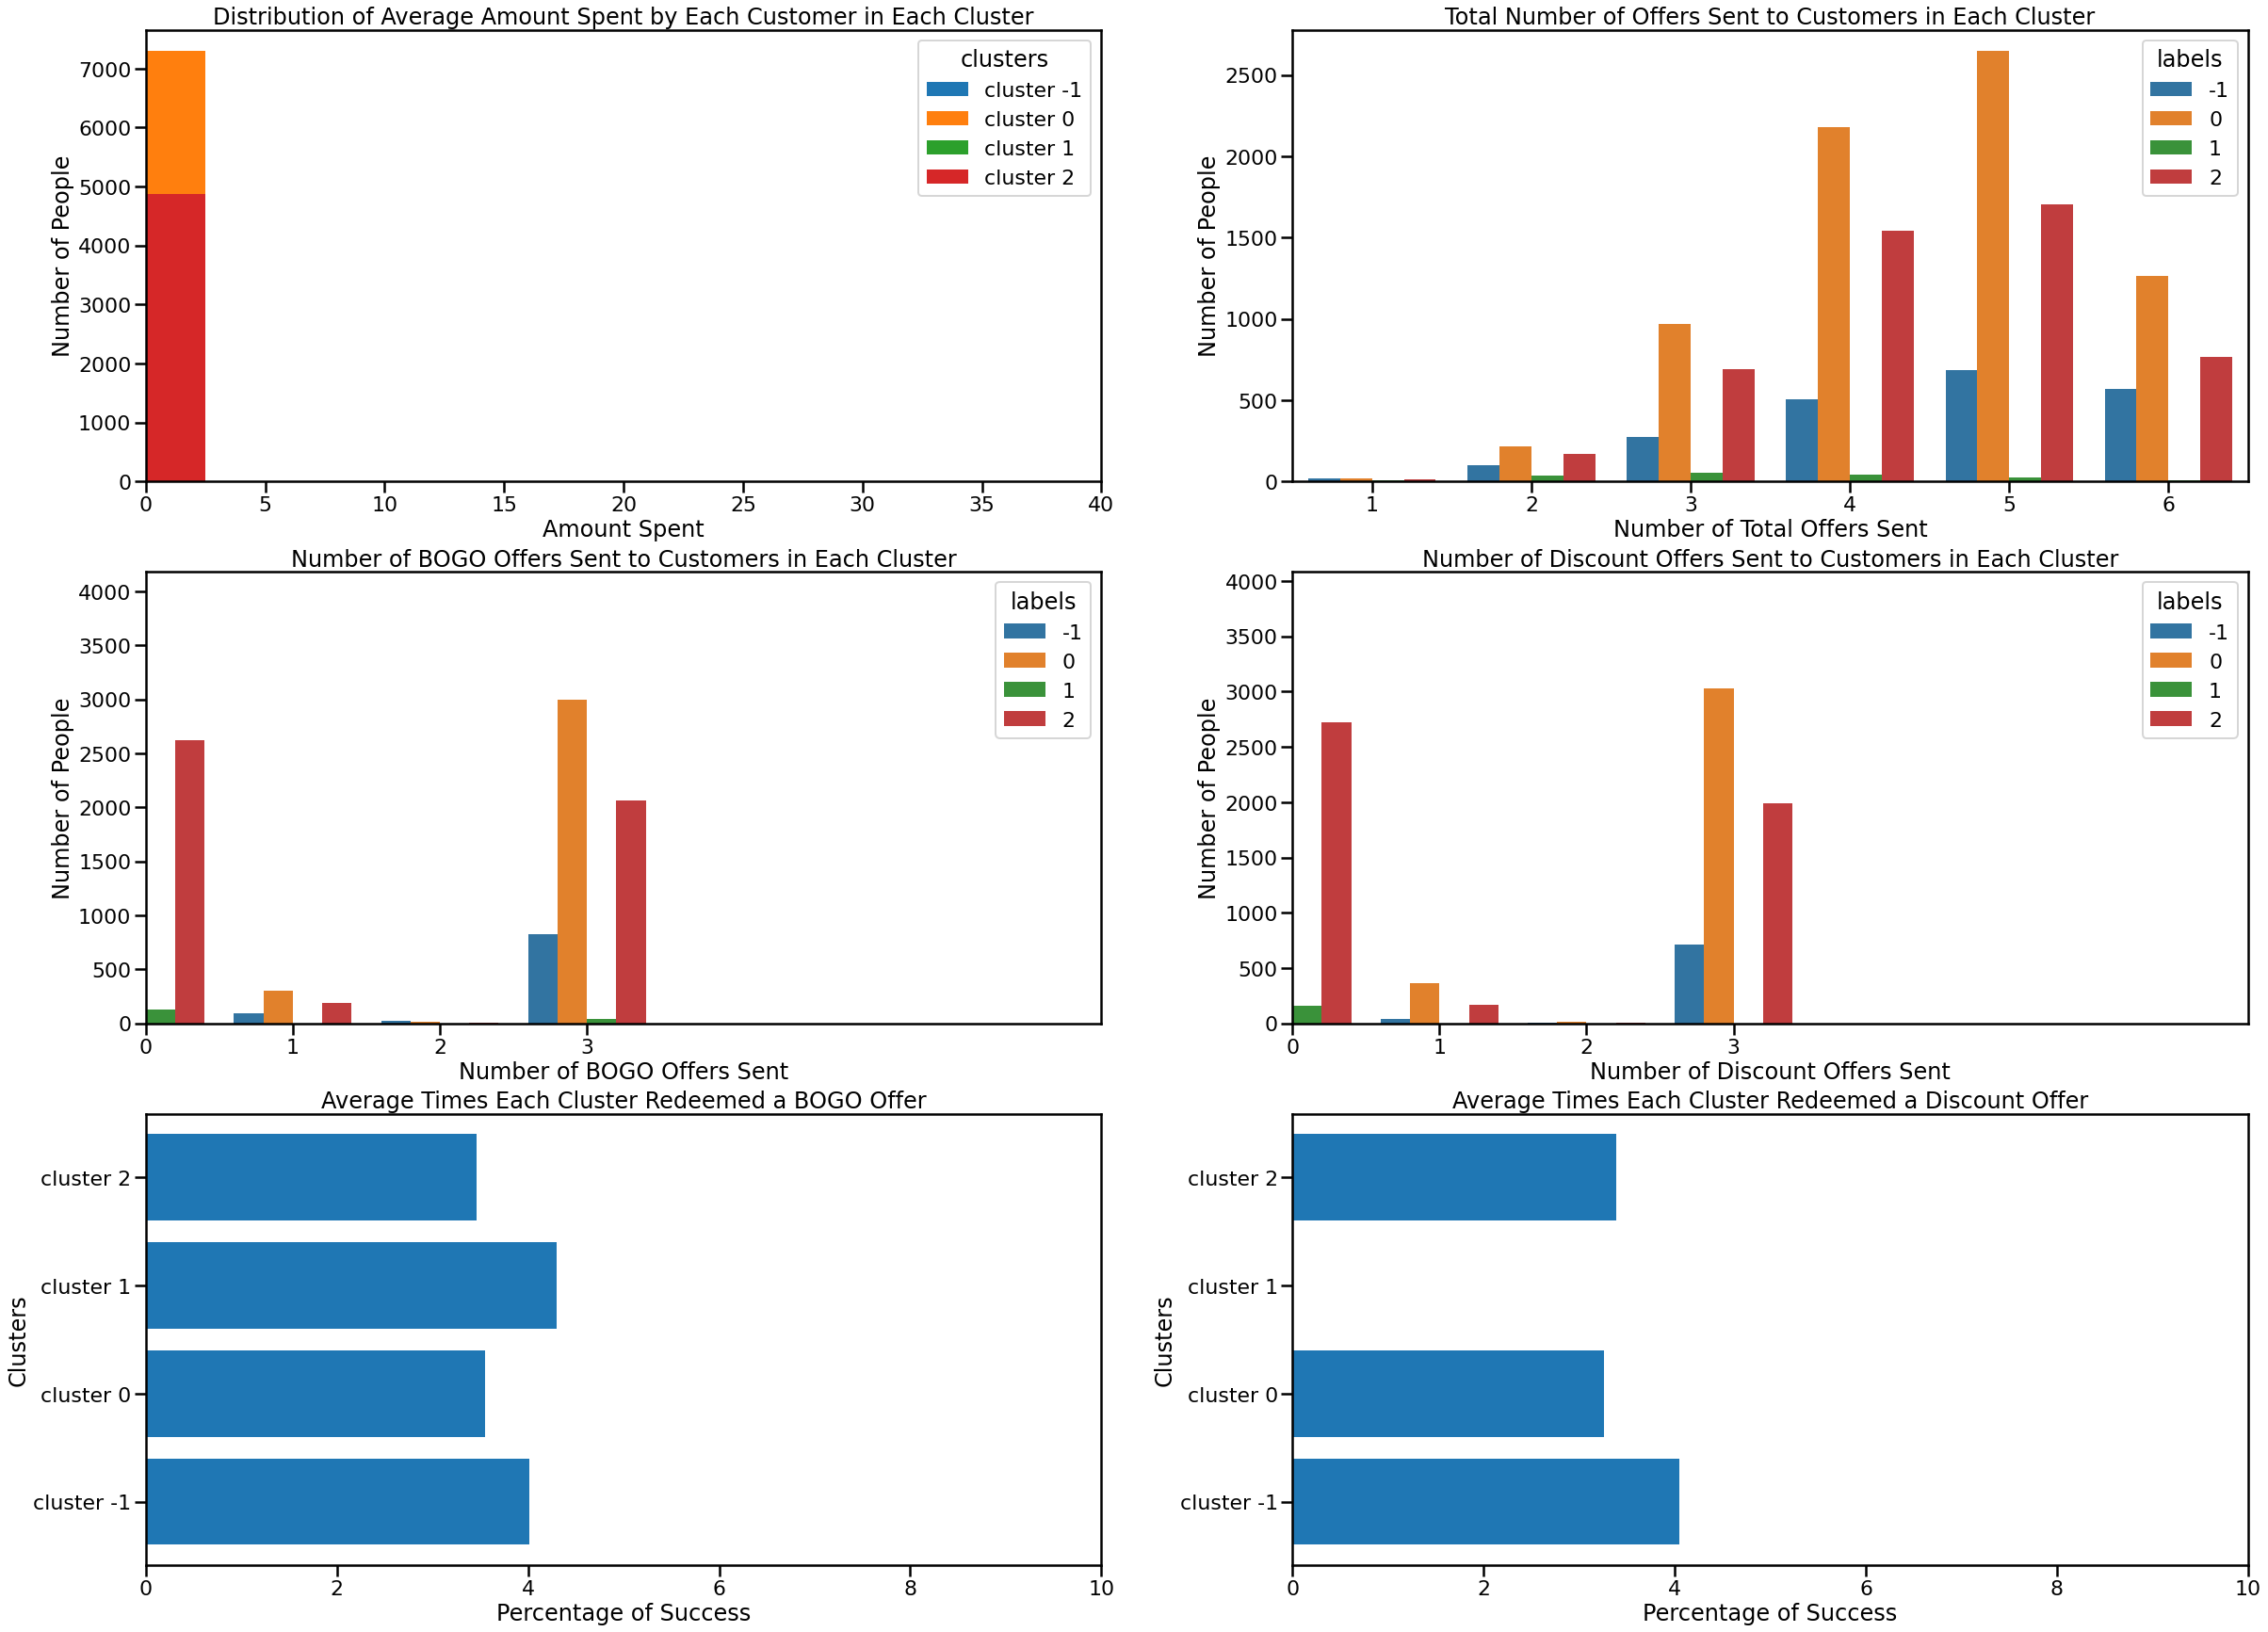

In [22]:

#Visualizing the behavioral attributes in more detail

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

#Visualizing the average amount spent by customers in each respective cluster
avg_spent_m1 = df_cluster[df_cluster['labels'] == -1]['avg_spent']
avg_spent_0 = df_cluster[df_cluster['labels'] == 0]['avg_spent']
avg_spent_1 = df_cluster[df_cluster['labels'] == 1]['avg_spent']
avg_spent_2 = df_cluster[df_cluster['labels'] == 2]['avg_spent']
avg_spent_bins = np.arange(min(df_cluster['avg_spent']), max(df_cluster['avg_spent'] + 2.5), 2.5)
axes[0,0].hist(avg_spent_m1, bins = avg_spent_bins, stacked = True);
axes[0,0].hist(avg_spent_0, bins = avg_spent_bins, stacked = True);
axes[0,0].hist(avg_spent_1, bins = avg_spent_bins, stacked = True);
axes[0,0].hist(avg_spent_2, bins = avg_spent_bins, stacked = True);
axes[0,0].set_xlim([0, 40]);
axes[0,0].legend(title = 'clusters', labels = ['cluster -1', 'cluster 0', 'cluster 1', 'cluster 2'], frameon = True);
axes[0,0].set_title('Distribution of Average Amount Spent by Each Customer in Each Cluster');
axes[0,0].set_xlabel('Amount Spent');
axes[0,0].set_ylabel('Number of People');

#Visualizing the total number of offers sent to the customers
sns.countplot(data = df_cluster, x = 'total_received', hue = 'labels', ax = axes[0,1]);
axes[0,1].set_title('Total Number of Offers Sent to Customers in Each Cluster');
axes[0,1].set_xlabel('Number of Total Offers Sent');
axes[0,1].set_ylabel('Number of People');

#Visualizing the number of BOGO offers sent to the customers
sns.countplot(data = df_cluster, x = 'bogos_received_range', hue = 'labels', ax = axes[1,0]);
axes[1,0].set_title('Number of BOGO Offers Sent to Customers in Each Cluster');
axes[1,0].set_xlabel('Number of BOGO Offers Sent');
axes[1,0].set_ylabel('Number of People');
axes[1,0].set_xlim([0, 6.5]);

#Visualizing the number of discount offers sent to the customers
sns.countplot(data = df_cluster, x = 'discounts_received_range', hue = 'labels', ax = axes[1,1]);
axes[1,1].set_title('Number of Discount Offers Sent to Customers in Each Cluster');
axes[1,1].set_xlabel('Number of Discount Offers Sent');
axes[1,1].set_ylabel('Number of People');
axes[1,1].set_xlim([0, 6.5]);

#Visualizing the mean of the how often customers completed bogo offers in each cluster
bogo_pct_completed_m1 = df_cluster[df_cluster['labels'] == -1]['bogo_percent_completed_range'].mean()
bogo_pct_completed_0 = df_cluster[df_cluster['labels'] == 0]['bogo_percent_completed_range'].mean()
bogo_pct_completed_1 = df_cluster[df_cluster['labels'] == 1]['bogo_percent_completed_range'].mean()
bogo_pct_completed_2 = df_cluster[df_cluster['labels'] == 2]['bogo_percent_completed_range'].mean()
bogo_pct_completed_data = [bogo_pct_completed_m1, bogo_pct_completed_0, bogo_pct_completed_1, bogo_pct_completed_2]
y_pos = np.arange(len(bogo_pct_completed_data))
bogo_tick_labels = ['cluster -1', 'cluster 0', 'cluster 1', 'cluster 2']
axes[2,0].barh(y_pos, bogo_pct_completed_data, tick_label = bogo_tick_labels);
axes[2,0].set_xlim([0, 10]);
axes[2,0].set_title('Average Times Each Cluster Redeemed a BOGO Offer');
axes[2,0].set_xlabel('Percentage of Success');
axes[2,0].set_ylabel('Clusters');

#Visualizing the mean of the how often customers completed discount offers in each cluster
discount_pct_completed_m1 = df_cluster[df_cluster['labels'] == -1]['discount_percent_completed_range'].mean()
discount_pct_completed_0 = df_cluster[df_cluster['labels'] == 0]['discount_percent_completed_range'].mean()
discount_pct_completed_1 = df_cluster[df_cluster['labels'] == 1]['discount_percent_completed_range'].mean()
discount_pct_completed_2 = df_cluster[df_cluster['labels'] == 2]['discount_percent_completed_range'].mean()
discount_pct_completed_data = [discount_pct_completed_m1, discount_pct_completed_0, discount_pct_completed_1, discount_pct_completed_2]
y_pos = np.arange(len(discount_pct_completed_data))
discount_tick_labels = ['cluster -1', 'cluster 0', 'cluster 1', 'cluster 2']
axes[2,1].barh(y_pos, discount_pct_completed_data, tick_label = discount_tick_labels);
axes[2,1].set_xlim([0, 10]);
axes[2,1].set_title('Average Times Each Cluster Redeemed a Discount Offer');
axes[2,1].set_xlabel('Percentage of Success');
axes[2,1].set_ylabel('Clusters');